In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

DATA LOAD:

In [80]:
data1 = pd.read_csv("jaipur_data.csv")
data1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Shanti Nagar Durgapura,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Jagatpura,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Bajrang Vihar,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Riddhi Siddhi,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Patrikar Colony,2 BHK,1200,2.0,1.0,51.00


In [81]:
data1['location']=data1['location'].str.lower()

In [82]:
data1.shape

(13320, 8)

In [83]:
data1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2417
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8788
Name: area_type, dtype: int64

In [84]:
data2=data1.drop(['area_type','balcony','availability'],axis='columns')
data2.shape

(13320, 5)

DATA CLEANING: HANDLE NA VALUES 

In [85]:
data2.isnull().sum()

location       4
size          19
total_sqft     3
bath          76
price          3
dtype: int64

In [86]:
data2.shape

(13320, 5)

In [87]:
data3=data2.dropna()
data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [88]:
data3.shape

(13243, 5)

Feature Engineering

In [89]:
data3['bhk']=data3['size'].apply(lambda x:int(x.split(' ')[0]))
data3.bhk.unique()

C:\Users\lkban\AppData\Local\Temp\ipykernel_768\917004737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['bhk']=data3['size'].apply(lambda x:int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [90]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [91]:
data3[~data3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,shri gopal nagar,4 BHK,2100 - 2850,4.0,186.000,4
122,yashwant nagar,4 BHK,3067 - 8156,4.0,477.000,4
137,nirman nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,moti dungri,2 BHK,1145 - 1340,2.0,43.490,2
188,kr puram,2 BHK,1015 - 1540,2.0,56.800,2


In [92]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [93]:
data4 = data3.copy()
data4.total_sqft = data4.total_sqft.apply(convert_sqft_to_num)
data4 = data4[data4.total_sqft.notnull()]
data4.head()

,location,size,total_sqft,bath,price,bhk
0,shanti nagar durgapura,2 BHK,1056.0,2.0,39.07,2
1,jagatpura,4 Bedroom,2600.0,5.0,120.00,4
2,bajrang vihar,3 BHK,1440.0,2.0,62.00,3
3,riddhi siddhi,3 BHK,1521.0,3.0,95.00,3
4,patrikar colony,2 BHK,1200.0,2.0,51.00,2


In [94]:
data4.loc[30]

location      shri gopal nagar
size                     4 BHK
total_sqft              2475.0
bath                       4.0
price                    186.0
bhk                          4
Name: 30, dtype: object

In [95]:
data5 = data4.copy()
data5['price_per_sqft'] = data5['price']*100000/data5['total_sqft']
data5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,shanti nagar durgapura,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,jagatpura,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,bajrang vihar,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,riddhi siddhi,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,patrikar colony,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [96]:
data5_stats = data5['price_per_sqft'].describe()
data5_stats

count    1.319700e+04
mean     7.921061e+03
std      1.067393e+05
min      2.678298e+02
25%      4.267458e+03
50%      5.438596e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [97]:
data5.to_csv("jpr.csv",index=False)

In [98]:
data5.location = data5.location.apply(lambda x: x.strip())
location_stats = data5['location'].value_counts(ascending=False)
location_stats

sfs mansarovar                  533
v.t. road                       392
malviya nagar                   304
raja park                       264
vaishali nagar                  235
                               ... 
rahat bagh                        1
maruthi hbcs layout               1
gayatri nagar a  bda complex      1
rajanna layout                    1
abshot layout                     1
Name: location, Length: 1261, dtype: int64

In [99]:
location_stats.values.sum()

13197

In [100]:
len(location_stats[location_stats>10])

231

In [101]:
len(location_stats)

1261

In [102]:
len(location_stats[location_stats<=10])

1030

Dimensionality Reduction

In [103]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

thyagaraja nagar                10
nagappa reddy layout            10
ganga nagar                     10
sadashiva nagar                 10
1st block koramangala           10
                                ..
rahat bagh                       1
maruthi hbcs layout              1
gayatri nagar a  bda complex     1
rajanna layout                   1
abshot layout                    1
Name: location, Length: 1030, dtype: int64

In [104]:
len(data5.location.unique())

1261

In [105]:
data5.location = data5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data5.location.unique())

232

Outlier Removal Using Business Logic

In [106]:
data5[data5.total_sqft/data5.bhk<285].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,sikar road,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,nevta,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [107]:
data5.shape

(13197, 7)

In [108]:
data6 = data5[~(data5.total_sqft/data5.bhk<285)]
data6.shape

(12482, 7)

Outlier Removal Using Standard Deviation and Mean

In [109]:
data6.price_per_sqft.describe()

count     12482.000000
mean       6321.082323
std        4187.813000
min         267.829813
25%        4210.526316
50%        5295.950156
75%        6933.333333
max      176470.588235
Name: price_per_sqft, dtype: float64

In [110]:
def remove_pps_outliers(data):
    data_out = pd.DataFrame()
    for key, subdata in data.groupby('location'):
        m = np.mean(subdata.price_per_sqft)
        st = np.std(subdata.price_per_sqft)
        reduced_data = subdata[(subdata.price_per_sqft>(m-st)) & (subdata.price_per_sqft<=(m+st))]
        data_out = pd.concat([data_out,reduced_data],ignore_index=True)
    return data_out
data7 = remove_pps_outliers(data6)
data7.shape

(10268, 7)

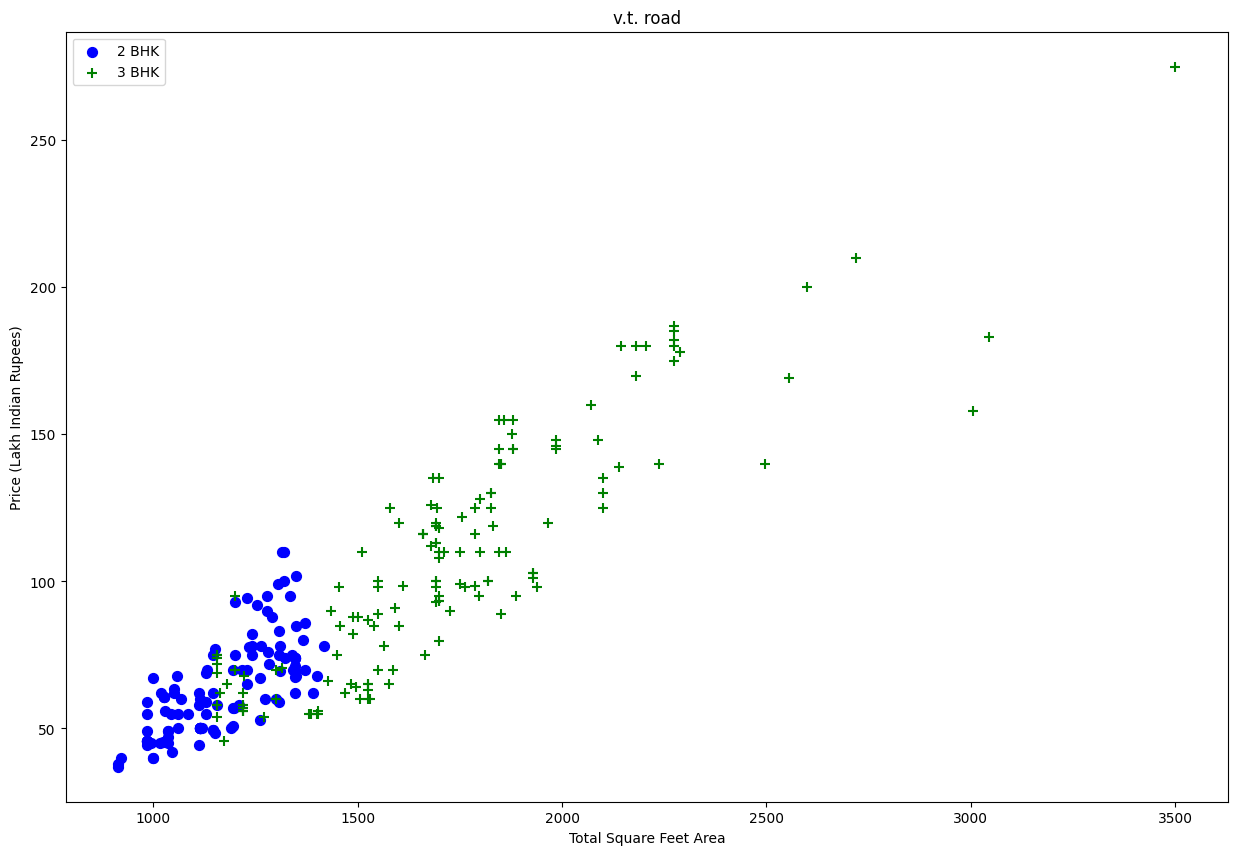

In [111]:
def plot_scatter_chart(data,location):
    bhk2 = data[(data.location==location) & (data.bhk==2)]
    bhk3 = data[(data.location==location) & (data.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(data7,"v.t. road")

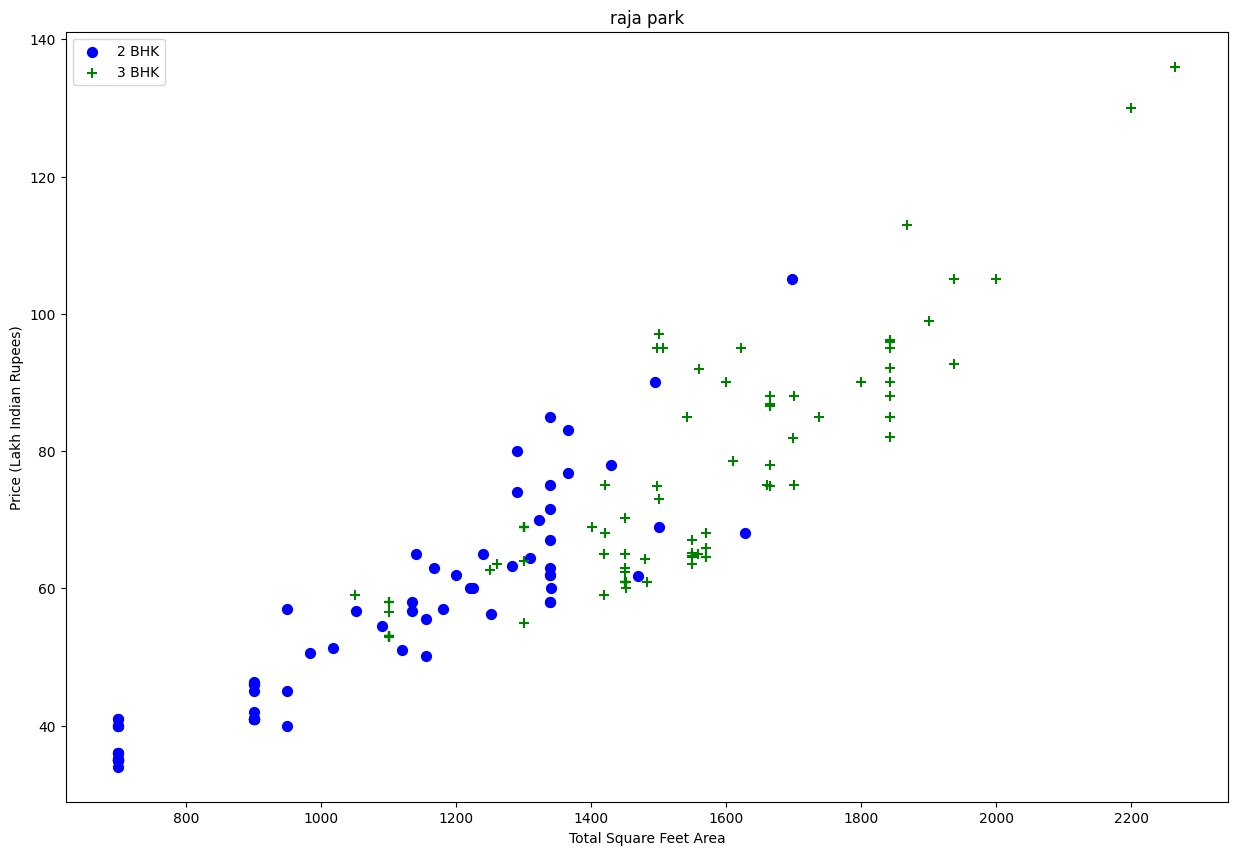

In [112]:
plot_scatter_chart(data7,"raja park")

In [113]:
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_data in data.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_data in location_data.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_data.price_per_sqft),
                'std': np.std(bhk_data.price_per_sqft),
                'count': bhk_data.shape[0]
            }
        for bhk, bhk_data in location_data.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_data[bhk_data.price_per_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')
data8 = remove_bhk_outliers(data7)
data8.shape

(7303, 7)

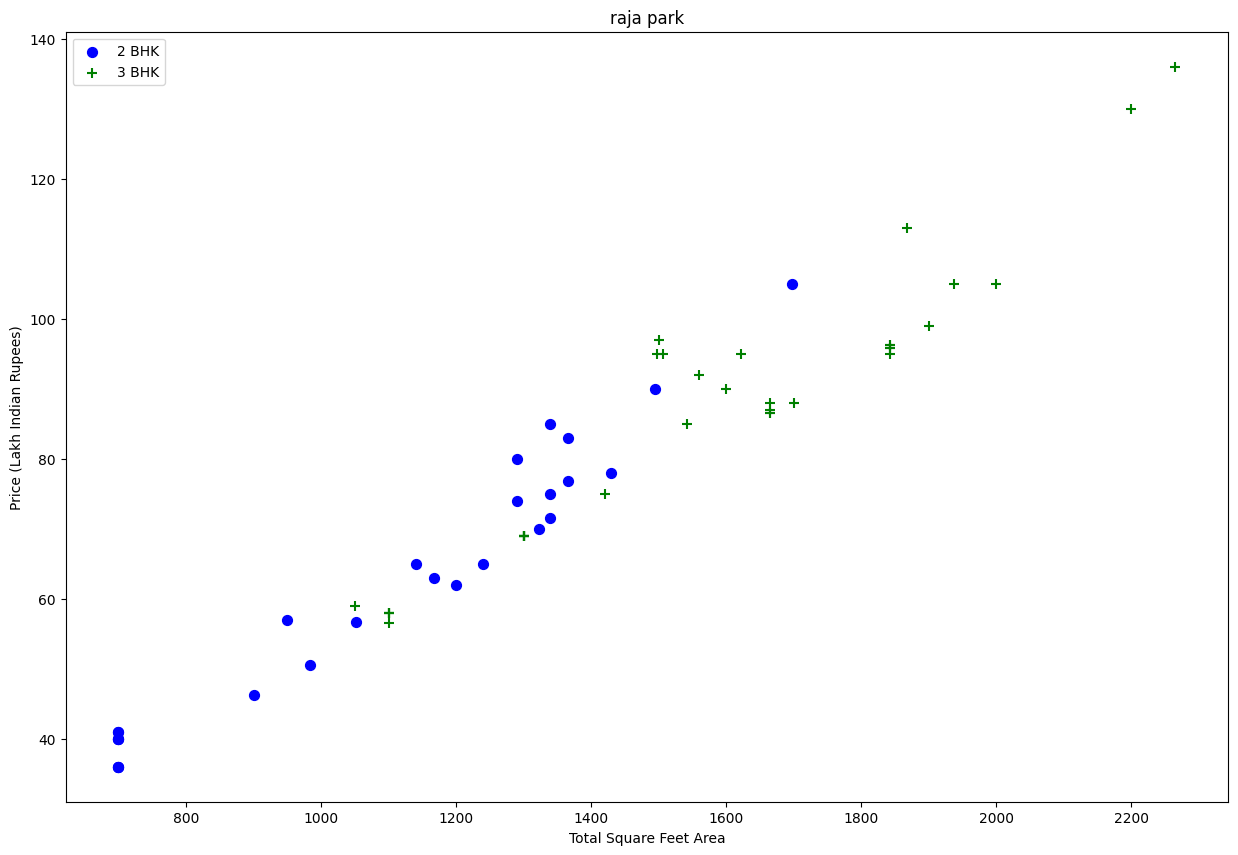

In [114]:
plot_scatter_chart(data8,"raja park")

Text(0, 0.5, 'Count')

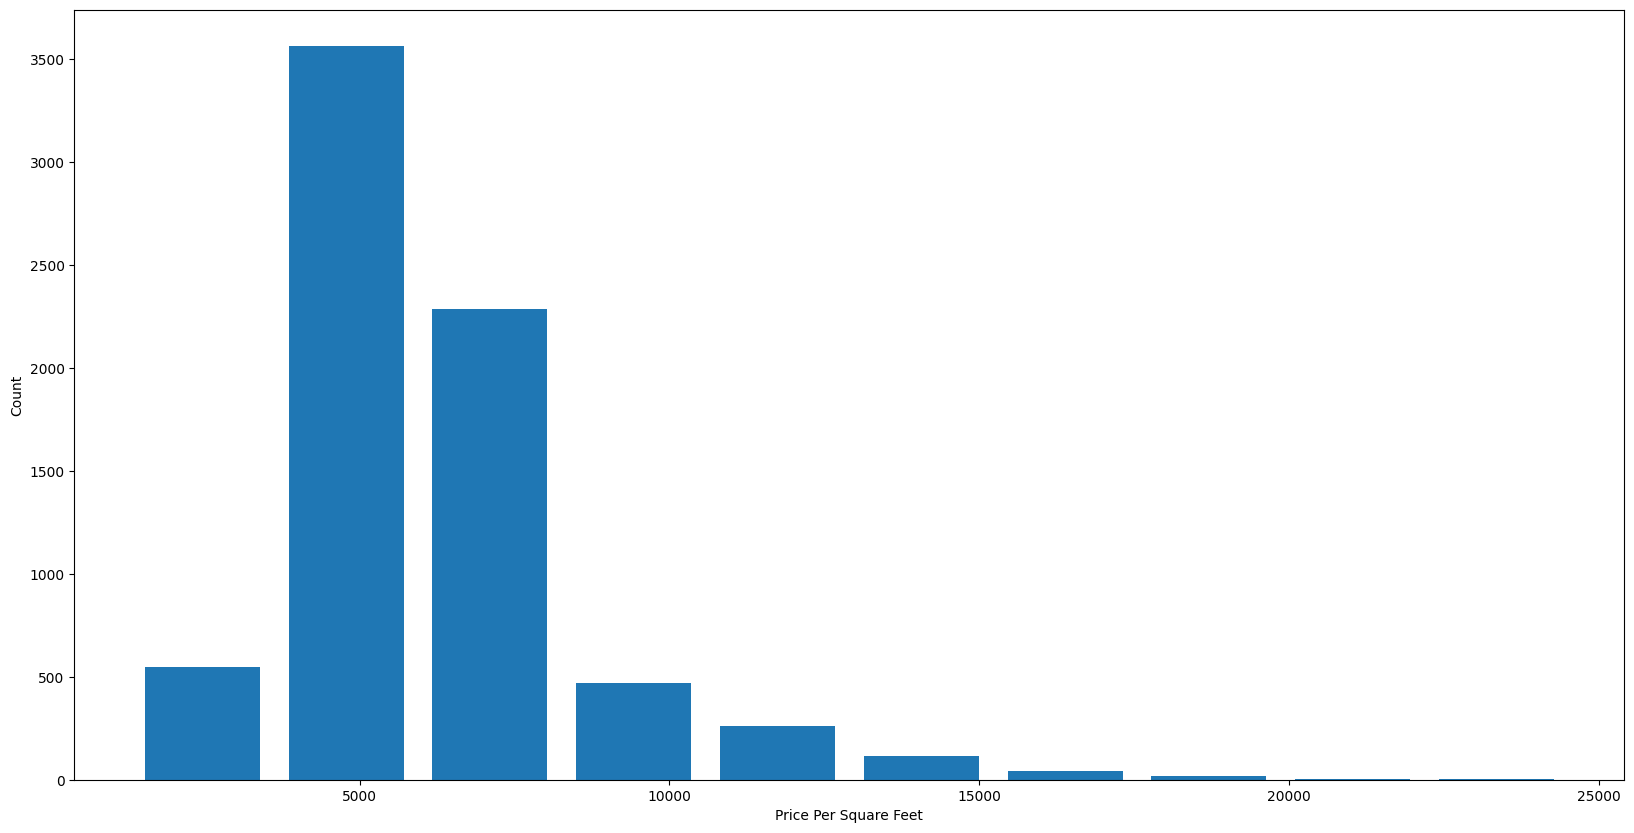

In [115]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Outlier Removal Using Bathrooms Feature

In [116]:
data8.bath.unique()

array([ 2.,  5.,  1.,  3.,  4.,  6.,  7.,  8.,  9., 12., 27., 16., 13.])

Text(0, 0.5, 'Count')

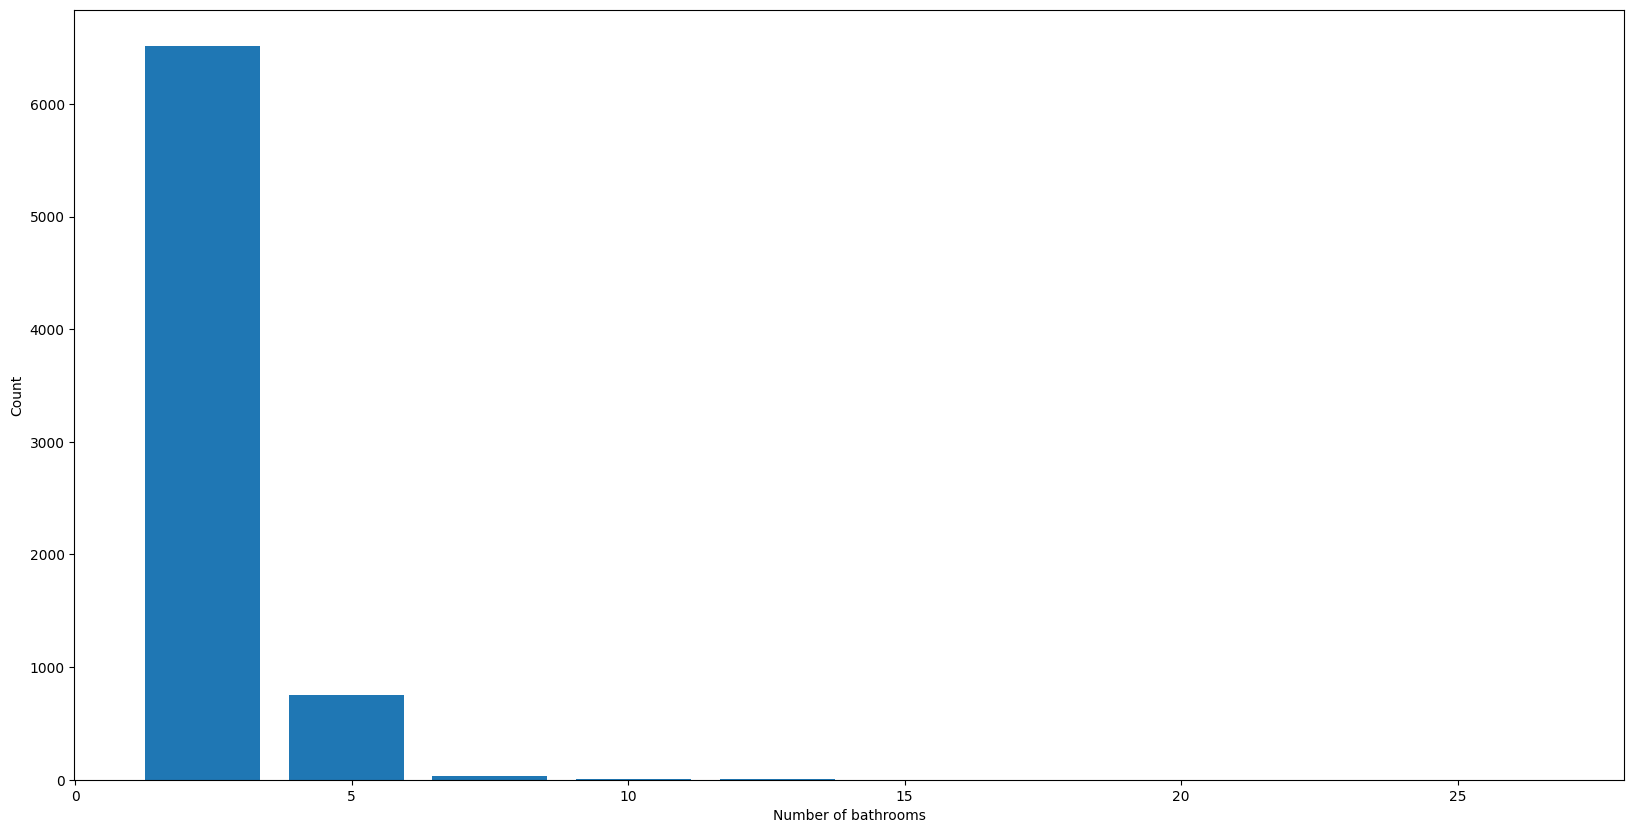

In [117]:
plt.hist(data8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [118]:
data8[data8.bath>data8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1252,hawa shadak,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
4341,nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5211,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
10007,vaishali nagar,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [119]:
data9 = data8[data8.bath<data8.bhk+2]
data9.shape

(7225, 7)

In [120]:
data10 = data9.drop(['size','price_per_sqft'],axis='columns')
data10.head(3)

,location,total_sqft,bath,price,bhk
0,aanad vihar,1050.0,2.0,52.07,2
2,aanad vihar,1050.0,2.0,55.50,2
4,aanad vihar,1050.0,2.0,53.50,2


Use One Hot Encoding For Location

In [121]:
dummies = pd.get_dummies(data10.location)
dummies.head()

,aanad vihar,adharsh nagar,agarwal farm,ajmer road,ambedkar colony,amer road,amer road industrial area,badi chopad,bagru,bagru road,...,varun path,vasanthapura,vidhyadhar nagar,vijay dwar,vijay path,vishveshwarya layout,vishwapriya layout,yashwant nagar,yashwant nagar yashwant nagar,yelenahalli
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
data11 = pd.concat([data10,dummies.drop('other',axis='columns')],axis='columns')
data11.head()

,location,total_sqft,bath,price,bhk,aanad vihar,adharsh nagar,agarwal farm,ajmer road,ambedkar colony,...,varun path,vasanthapura,vidhyadhar nagar,vijay dwar,vijay path,vishveshwarya layout,vishwapriya layout,yashwant nagar,yashwant nagar yashwant nagar,yelenahalli
0,aanad vihar,1050.0,2.0,52.07,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,aanad vihar,1050.0,2.0,55.50,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,aanad vihar,1050.0,2.0,53.50,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,aanad vihar,1220.0,2.0,59.50,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,aanad vihar,1050.0,2.0,52.50,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
data12 = data11.drop('location',axis='columns')
data12.head(2)

,total_sqft,bath,price,bhk,aanad vihar,adharsh nagar,agarwal farm,ajmer road,ambedkar colony,amer road,...,varun path,vasanthapura,vidhyadhar nagar,vijay dwar,vijay path,vishveshwarya layout,vishwapriya layout,yashwant nagar,yashwant nagar yashwant nagar,yelenahalli
0,1050.0,2.0,52.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1050.0,2.0,55.50,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Build a Model Now...

In [124]:
data12.shape

(7225, 235)

In [125]:
X = data12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,aanad vihar,adharsh nagar,agarwal farm,ajmer road,ambedkar colony,amer road,amer road industrial area,...,varun path,vasanthapura,vidhyadhar nagar,vijay dwar,vijay path,vishveshwarya layout,vishwapriya layout,yashwant nagar,yashwant nagar yashwant nagar,yelenahalli
0,1050.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1050.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1050.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
X.shape

(7225, 234)

In [127]:
y = data12.price
y.head()

0    52.07
2    55.50
4    53.50
6    59.50
7    52.50
Name: price, dtype: float64

In [128]:
len(y)

7225

Linear Regression

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [130]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7502175789358821

Use K Fold cross validation to measure accuracy of our LinearRegression model

In [131]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.7944534 , 0.82727395, 0.83396476, 0.77244174, 0.84760512])

Test the model for few properties

In [132]:
def predict_price(location,sqft,bhk,bath):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [133]:
predict_price('nirman nagar',1000, 2, 2)

c:\Users\lkban\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.799514876463235

In [134]:
predict_price('shanti nagar durgapura',1000, 3, 3)

c:\Users\lkban\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.166809554891245

In [135]:
predict_price('mansarovar extension',1000,2,2)

c:\Users\lkban\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


64.04025908548445

FINAL PREDICTION

In [155]:
location=input("Enter the location:")
location=location.lower()
sqft=int(input("Enter the area(in sq ft):"))
bhk=int(input("enter no of bedrooms:"))
bath=int(input("enter no of bathroom:"))
print('Price of House at ',location,' of total sqft ',sqft,' is ',round(predict_price(location,sqft,bhk,bath),2), 'lakh')